# Aux 6:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb

El obetivo es calcular y graficar **distancia angular** y la **distancia de luminosidad** 

### Paso 1: Definir Cosmologia

In [2]:
omega_m = 0.315
omega_bh2 = 0.0224
omega_ch2 = 0.12
omega_k = 1 - omega_m - omega_bh2 - omega_ch2
h0 = 67.4
w = -1
ns = 0.965
tau = 0.054
c =300000

In [3]:
# Creamos un objeto donde guardaremos los parametros cosmologicos
pars = camb.CAMBparams()

pars.set_cosmology(H0= h0,ombh2=omega_bh2, omch2=omega_ch2, tau = tau )

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [4]:
# Ahora, para obtener resultados podemos simplemente llamar a otro objeto
results = camb.get_results(pars)

### Paso 2: Definir distancias

In [5]:
help(results.luminosity_distance)

Help on method luminosity_distance in module camb.results:

luminosity_distance(z: float | collections.abc.Sequence[numpy.number | float | int] | numpy.ndarray[tuple[int, ...], numpy.dtype[numpy.number]]) method of camb.results.CAMBdata instance
    Get luminosity distance from to redshift z.

    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer functions or
    power spectra.

    :param z: redshift or array of redshifts
    :return: luminosity distance (matches rank of z)



In [6]:
help(results.angular_diameter_distance)

Help on method angular_diameter_distance in module camb.results:

angular_diameter_distance(z) method of camb.results.CAMBdata instance
    Get (non-comoving) angular diameter distance to redshift z.

    Must have called :meth:`calc_background`, :meth:`calc_background_no_thermo` or calculated transfer
    functions or power spectra.

    :param z: redshift or array of redshifts
    :return: angular diameter distances, matching rank of z



In [14]:
zs = np.linspace(0,10, 1000)

D_ang = results.angular_diameter_distance(zs)
D_lum = results.luminosity_distance(zs)

Text(0, 0.5, 'd [Mpc]')

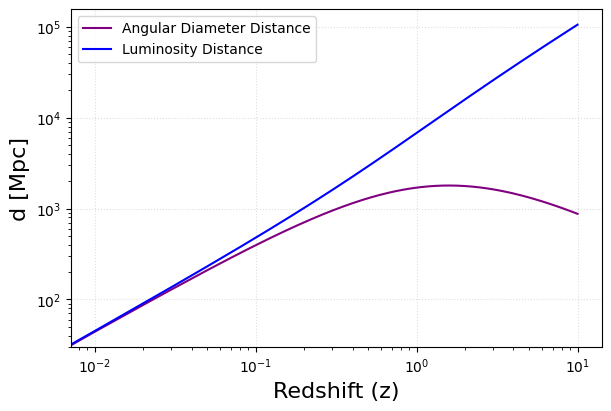

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey = True, figsize = (6,4), constrained_layout = True)

ax.loglog(zs, D_ang, color = 'purple', label = 'Angular Diameter Distance')
ax.loglog(zs, D_lum, color = 'b', label = 'Luminosity Distance')

ax.grid(alpha = 0.4, ls= ':')
ax.legend()
ax.set_xlabel('Redshift (z)', fontsize=16)
ax.set_ylabel('d [Mpc]', fontsize = 16)

## Do it

Comparar lo obtenido en CAMB, con la solucion analitica. Para la solucion analitica, es recomendable definir las funciones dependiendo de los parametros cosmologicos $\Omega_{a}$, para que puedan ver como cambia sus resultados al ir variando parametros.

(Recuerden que el subindice hace referecia a evaluar en el tiempo presente, no confundir con la notacion de derivadas en GR)

La forma analitica de las distancias es:

$$D_{A}(z) = \frac{f_{k}(\chi)}{1 + z} , \space D_{L} = (1+z) f_{k}(\chi)$$

donde:
$$ \chi(z) = \int_{0}^{z} \frac{dx}{E(x)} , \space E(z) = \frac{H(z)}{H_{0}}$$

La funcion de curvatura $f_{k}(\chi)$:


$$
f_{k}(\chi) = 
\begin{cases}
\dfrac{c}{H_{0}\sqrt{\Omega_{K,0}}}\;
\sinh\!\Big(\sqrt{\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} >0 \\
\dfrac{c}{H_{0}}\;\chi & \Omega_{K,0} = 0, \\
\dfrac{c}{H_{0}\sqrt{-\Omega_{K,0}}}\;
\sin\!\Big(\sqrt{-\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} < 0>.

\end{cases}
$$
Con un componente de radiacion, materia, energia oscura (con ecuacion de estado w) y curvatura
$$
H^{2}(z) = H_{0}^{2} \left[ \Omega_{r,0}(1 +z )^{4} + \Omega_{m,0}(1 +z)^{3} + \Omega_{\Lambda,0}(1 +z)^{3(1+\omega)} + \Omega_{K,0}(1+z)^{2}\right]
$$

In [ ]:
def d_A(fk,z):
    return fk/(1+z)

def d_L(fk,z):
    return (1 +z)*fk

def H2_z(z):
    return (h0**2)*(omega_r*(1 +z)**4 + omega_m*(1+z)**3 + omega_k*(1 +z)**2 + omega_lambda*(1+z)**(3*(1+w)))

def f_k(z, o_k):
    
    if o_k < 0:
        return c/(h0* np.sqrt(o_k)) *np.sinh(np.sqrt(o_k)* chi(z))

def E_z(z):
    return np.sqrt(H2_z(z))/h0

def chi(z):
    dz = np.diff(z)[-1]
    return np.cumsum(dz/E_z(z))





In [13]:
z = np.linspace(0,10,100)

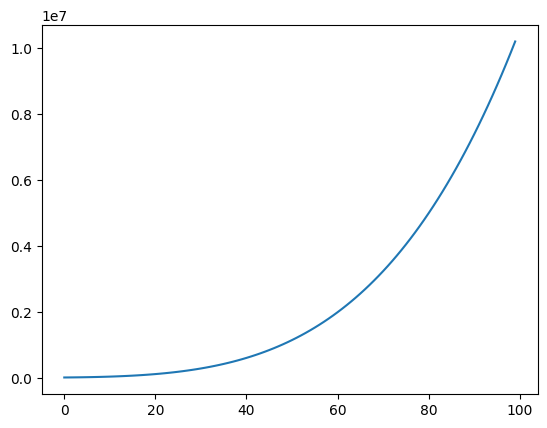

In [15]:
plt.plot(H2_z(z))